# **TUGAS 1 MATA KULIAH ANALISIS BIG DATA**

### **Data 1 : Student Info**

1. Import Library dan Import File CSV

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/AnalisisBigData/studentInfo.csv'

Mounted at /content/drive


In [3]:
df = pd.read_csv(path)
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


2. EDA
Untuk Exploratory Data Analysis, saya melakukan beberapa hal, diantaranya:

*   Melihat ukuran data secara jumlah data dan jumlah fitur
*   Melihat Nilai Kuartil dan Nilai Median yang ada pada fitur yang bertipe numerik
*   melihat informasi yang lebih rinci secara deskriptif mengenai data yang di-load, meliputi nama fitur di setiap kolomnya, jumlah data yang tidak null/kosong, dan juga type data di setiap fitur/kolomnya
*   Melihat Jumlah Data Null/Kosong Tiap Fitur



In [4]:
df.shape

(32593, 12)

In [5]:
df.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

3. Visualisasi

*   Visualisasi jumlah murid yang dibedakan berdasarkan jenis kelamin
*   Visualisasi jumlah murid berdasarkan wilayah tempat tinggal
*   Visualisasi jumlah murid berdasarkan Informasi Disabilitas
*   Visualisasi jumlah murid berdasarkan Status Akhir

In [19]:
df['gender'].value_counts()

M    17875
F    14718
Name: gender, dtype: int64

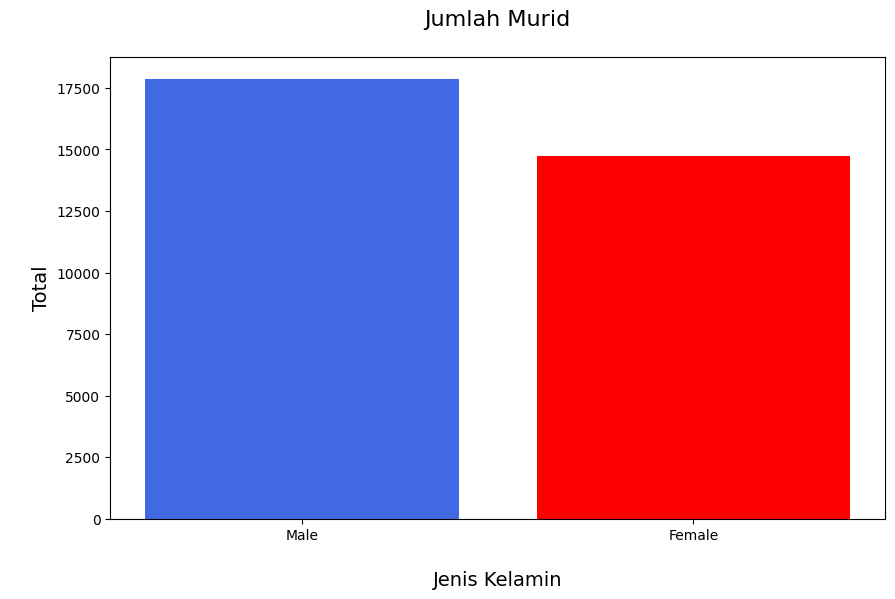

In [18]:
count = df['gender'].value_counts()
plt.figure(figsize=(10, 6))

plt.bar(['Laki-laki', 'Perempuan'], count, color=['royalblue','red'])

plt.title('Jumlah Murid\n', size=16)
plt.xlabel('\nJenis Kelamin', size=14)
plt.ylabel('\nTotal', size=14)
plt.show()

In [10]:
df['region'].value_counts()

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

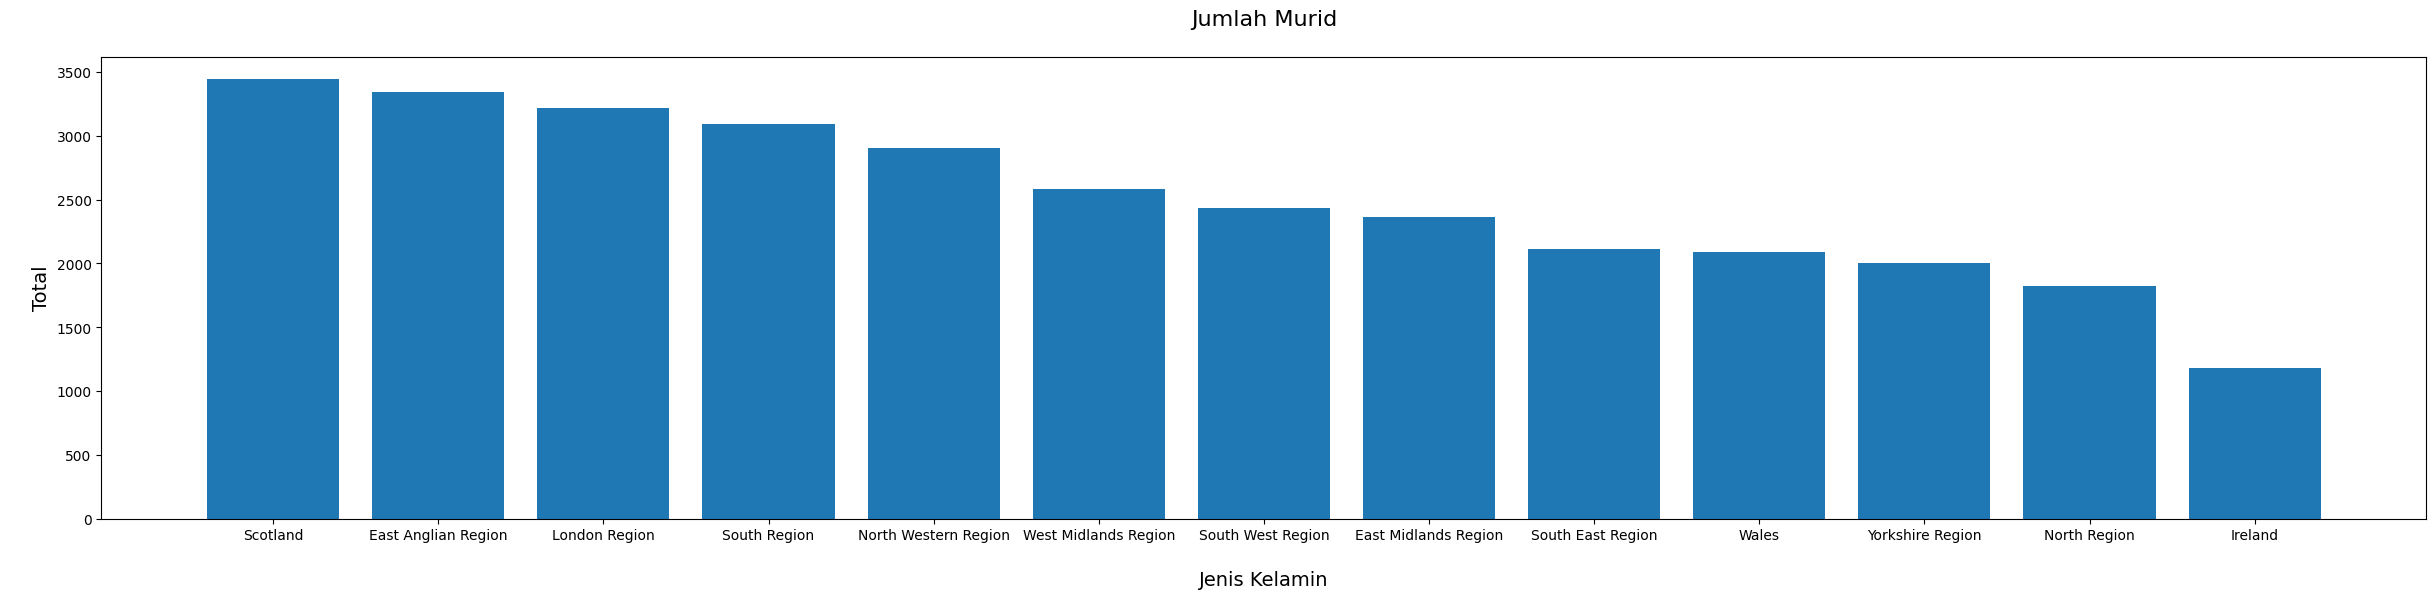

In [26]:
count = df['region'].value_counts()
plt.figure(figsize=(30, 6))

plt.bar(['Scotland', 'East Anglian Region', 'London Region', 'South Region', 'North Western Region', 'West Midlands Region',
         'South West Region', 'East Midlands Region', 'South East Region', 'Wales', 'Yorkshire Region', 'North Region', 'Ireland'], count)

plt.title('Wilayah Asal Murid\n', size=16)
plt.xlabel('\nWilayah Asal', size=14)
plt.ylabel('\nTotal', size=14)
plt.show()

In [29]:
df['disability'].value_counts()


N    29429
Y     3164
Name: disability, dtype: int64

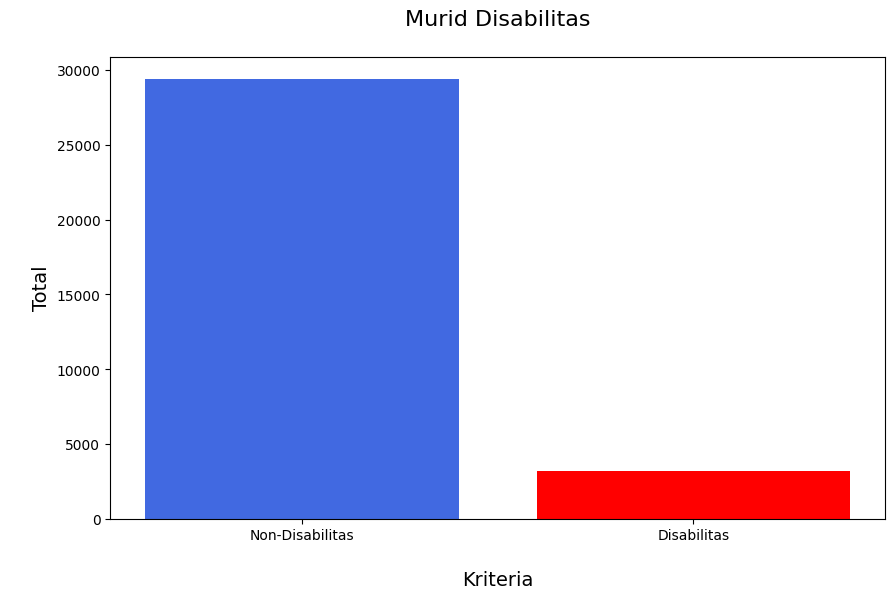

In [30]:
count = df['disability'].value_counts()
plt.figure(figsize=(10, 6))

plt.bar(['Non-Disabilitas', 'Disabilitas'], count, color=['royalblue','red'])

plt.title('Murid Disabilitas\n', size=16)
plt.xlabel('\nKriteria', size=14)
plt.ylabel('\nTotal', size=14)
plt.show()

In [31]:
df['final_result'].value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

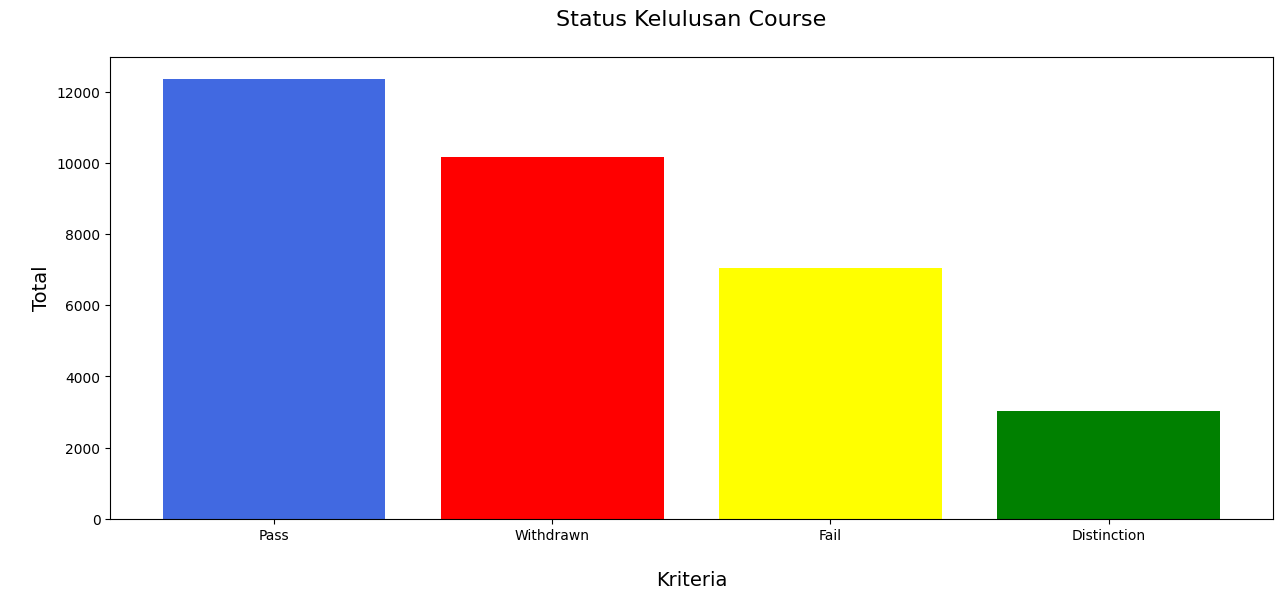

In [33]:
count = df['final_result'].value_counts()
plt.figure(figsize=(15, 6))

plt.bar(['Pass', 'Withdrawn', 'Fail', 'Distinction'], count, color=['royalblue','red', 'yellow', 'green'])

plt.title('Status Kelulusan Course\n', size=16)
plt.xlabel('\nKriteria', size=14)
plt.ylabel('\nTotal', size=14)
plt.show()

### **Data 2: VLE**

1. Import File CSV

In [34]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/AnalisisBigData/vle.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv(path)
df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


2. EDA
Untuk Exploratory Data Analysis, saya melakukan beberapa hal, diantaranya:

*   Melihat ukuran data secara jumlah data dan jumlah fitur
*   Melihat Nilai Kuartil dan Nilai Median yang ada pada fitur yang bertipe numerik
*   melihat informasi yang lebih rinci secara deskriptif mengenai data yang di-load, meliputi nama fitur di setiap kolomnya, jumlah data yang tidak null/kosong, dan juga type data di setiap fitur/kolomnya
*   Melihat Jumlah Data Null/Kosong Tiap Fitur

In [36]:
df.shape

(6364, 6)

In [37]:
df.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [39]:
df.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

3. Visualisasi

*   Visualisasi Tipe Aktivitas dan Jumlahnya yang dilakukan oleh murid

In [40]:
df['activity_type'].value_counts()

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
ouelluminate        21
glossary            21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64

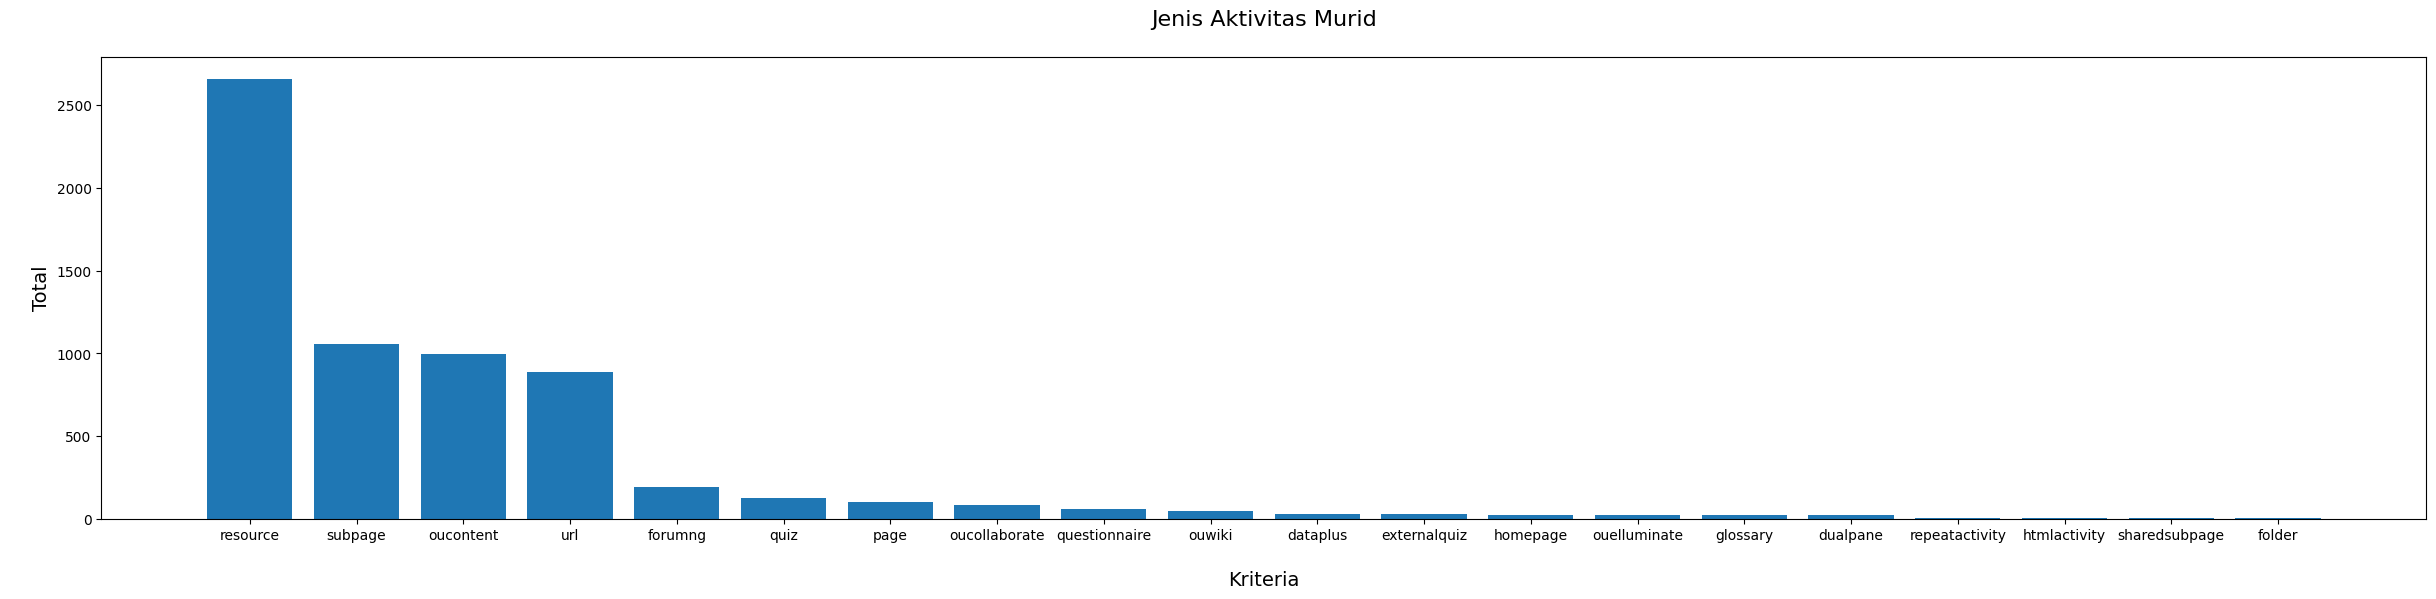

In [41]:
count = df['activity_type'].value_counts()
plt.figure(figsize=(30, 6))

plt.bar(['resource', 'subpage', 'oucontent', 'url', 'forumng', 'quiz', 'page', 'oucollaborate', 'questionnaire', 'ouwiki',
         'dataplus', 'externalquiz', 'homepage', 'ouelluminate', 'glossary', 'dualpane', 'repeatactivity', 'htmlactivity', 'sharedsubpage', 'folder'], count)

plt.title('Jenis Aktivitas Murid\n', size=16)
plt.xlabel('\nKriteria', size=14)
plt.ylabel('\nTotal', size=14)
plt.show()

### **Data 3: Assessment**s

1. Import File CSV

In [42]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/AnalisisBigData/assessments.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv(path)
df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


2. EDA
Untuk Exploratory Data Analysis, saya melakukan beberapa hal, diantaranya:

*   Melihat ukuran data secara jumlah data dan jumlah fitur
*   Melihat Nilai Kuartil dan Nilai Median yang ada pada fitur yang bertipe numerik
*   melihat informasi yang lebih rinci secara deskriptif mengenai data yang di-load, meliputi nama fitur di setiap kolomnya, jumlah data yang tidak null/kosong, dan juga type data di setiap fitur/kolomnya
*   Melihat Jumlah Data Null/Kosong Tiap Fitur

In [44]:
df.shape

(206, 6)

In [45]:
df.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [47]:
df.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

3. Visualisasi

*   Visualisasi Tipe Tugas dan Jumlahnya yang dilakukan oleh murid

In [48]:
df['assessment_type'].value_counts()

TMA     106
CMA      76
Exam     24
Name: assessment_type, dtype: int64

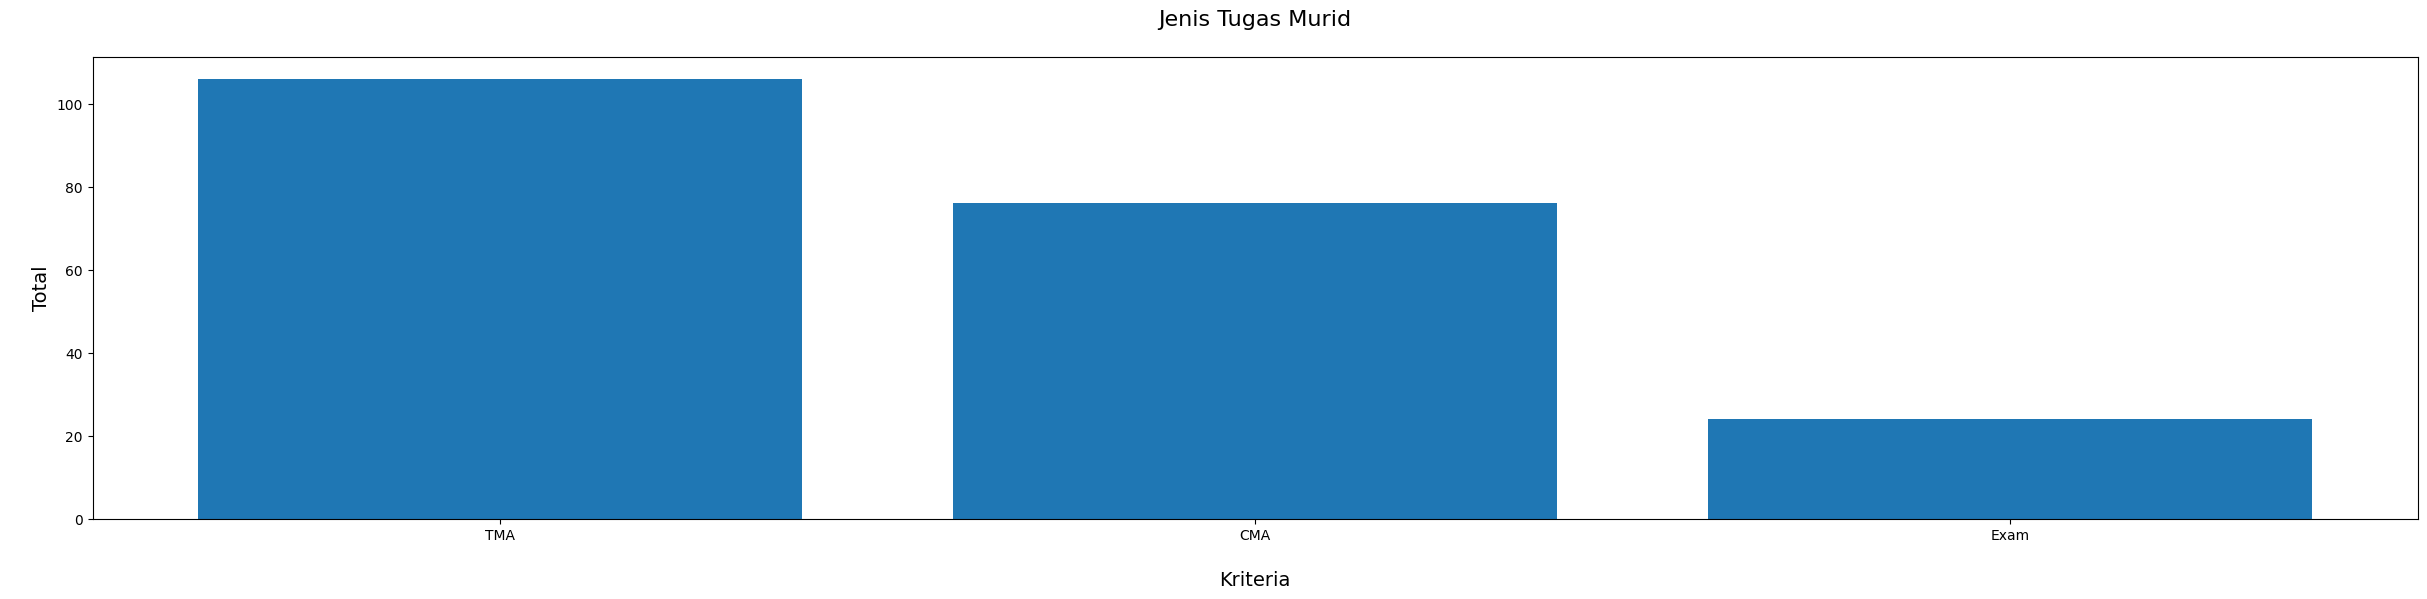

In [49]:
count = df['assessment_type'].value_counts()
plt.figure(figsize=(30, 6))

plt.bar(['TMA', 'CMA', 'Exam'], count)

plt.title('Jenis Tugas Murid\n', size=16)
plt.xlabel('\nKriteria', size=14)
plt.ylabel('\nTotal', size=14)
plt.show()

### **Data 4: Courses**

1. Import File CSV

In [50]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/AnalisisBigData/courses.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
df = pd.read_csv(path)
df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


2. EDA
Untuk Exploratory Data Analysis, saya melakukan beberapa hal, diantaranya:

*   Melihat ukuran data secara jumlah data dan jumlah fitur
*   Melihat Nilai Kuartil dan Nilai Median yang ada pada fitur yang bertipe numerik
*   melihat informasi yang lebih rinci secara deskriptif mengenai data yang di-load, meliputi nama fitur di setiap kolomnya, jumlah data yang tidak null/kosong, dan juga type data di setiap fitur/kolomnya
*   Melihat Jumlah Data Null/Kosong Tiap Fitur



In [52]:
df.shape

(22, 3)

In [53]:
df.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [55]:
df.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

3. Visualisasi

*   Visualisasi Jenis Modul dan Panjangnya serta Jumlah modul yang harus dikerjakan oleh murid

In [56]:
df['module_presentation_length'].value_counts()

269    5
241    5
268    4
240    3
262    2
261    2
234    1
Name: module_presentation_length, dtype: int64

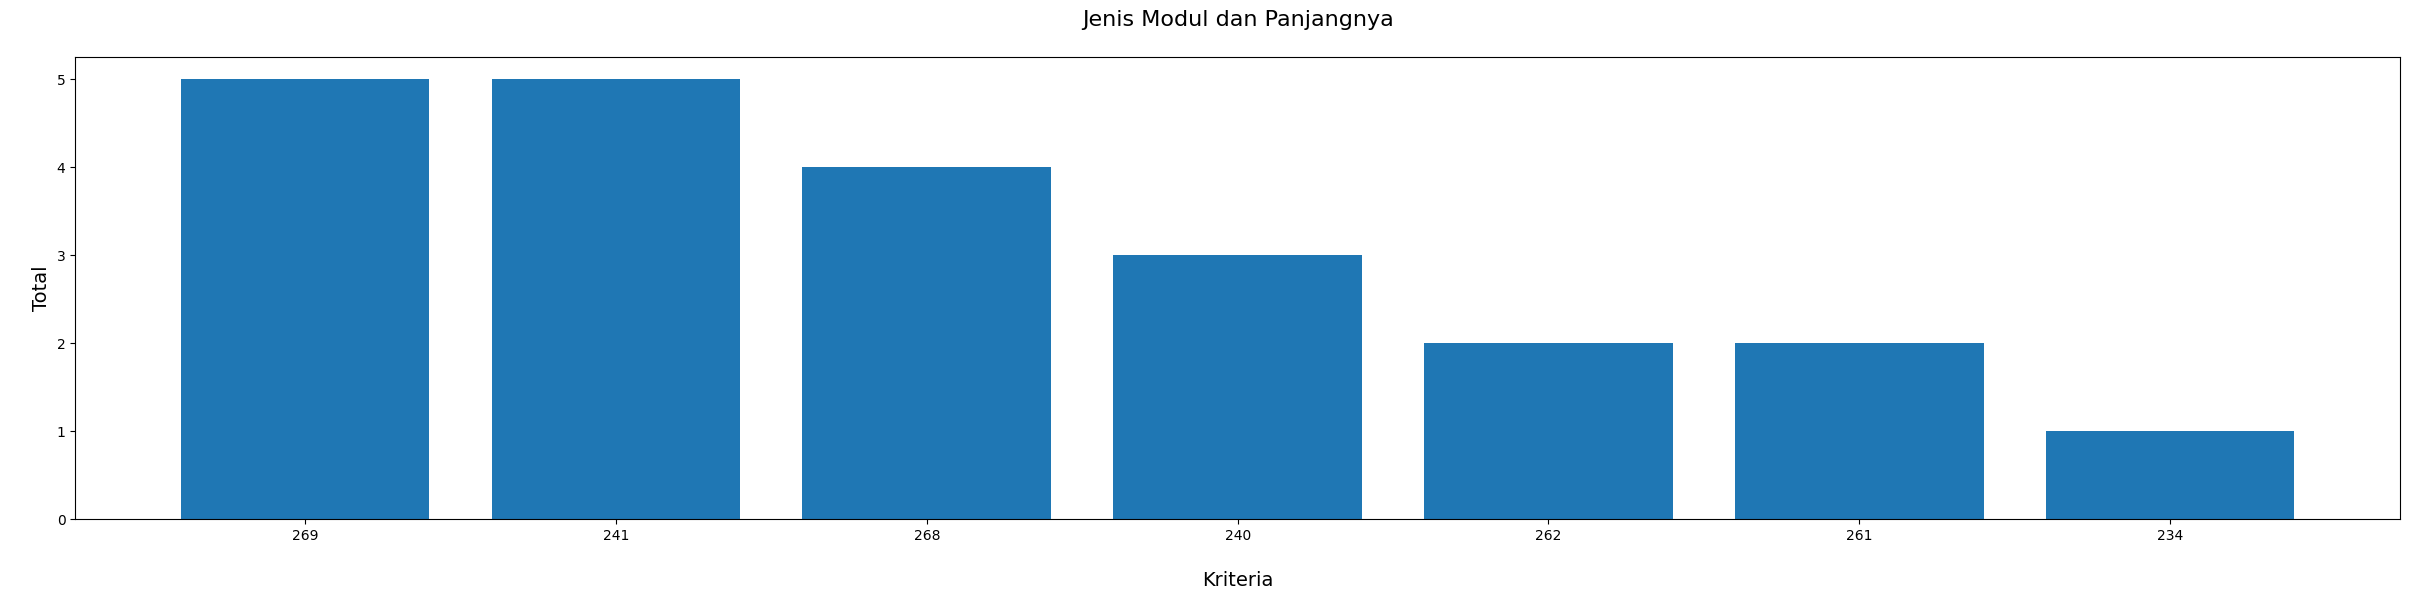

In [57]:
count = df['module_presentation_length'].value_counts()
plt.figure(figsize=(30, 6))

plt.bar(['269', '241', '268', '240', '262', '261', '234'], count)

plt.title('Jenis Modul dan Panjangnya\n', size=16)
plt.xlabel('\nKriteria', size=14)
plt.ylabel('\nTotal', size=14)
plt.show()

### **Data 5: Student Assessment**

1. Import File CSV

In [58]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/AnalisisBigData/studentAssessment.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df = pd.read_csv(path)
df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


2. EDA
Untuk Exploratory Data Analysis, saya melakukan beberapa hal, diantaranya:

*   Melihat ukuran data secara jumlah data dan jumlah fitur
*   Melihat Nilai Kuartil dan Nilai Median yang ada pada fitur yang bertipe numerik
*   melihat informasi yang lebih rinci secara deskriptif mengenai data yang di-load, meliputi nama fitur di setiap kolomnya, jumlah data yang tidak null/kosong, dan juga type data di setiap fitur/kolomnya
*   Melihat Jumlah Data Null/Kosong Tiap Fitur

In [60]:
df.shape

(173912, 5)

In [61]:
df.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [63]:
df.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

### **Data 6: Student Registration**

1. Import File CSV

In [64]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/AnalisisBigData/studentRegistration.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df = pd.read_csv(path)
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


2. EDA
Untuk Exploratory Data Analysis, saya melakukan beberapa hal, diantaranya:

*   Melihat ukuran data secara jumlah data dan jumlah fitur
*   Melihat Nilai Kuartil dan Nilai Median yang ada pada fitur yang bertipe numerik
*   melihat informasi yang lebih rinci secara deskriptif mengenai data yang di-load, meliputi nama fitur di setiap kolomnya, jumlah data yang tidak null/kosong, dan juga type data di setiap fitur/kolomnya
*   Melihat Jumlah Data Null/Kosong Tiap Fitur

In [66]:
df.shape

(32593, 5)

In [67]:
df.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [69]:
df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

### **Data 7: Student VLE**

1. Import File CSV

In [77]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/AnalisisBigData/studentVle.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
df = pd.read_csv(path)
df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


2. EDA
Untuk Exploratory Data Analysis, saya melakukan beberapa hal, diantaranya:

*   Melihat ukuran data secara jumlah data dan jumlah fitur
*   Melihat Nilai Kuartil dan Nilai Median yang ada pada fitur yang bertipe numerik
*   melihat informasi yang lebih rinci secara deskriptif mengenai data yang di-load, meliputi nama fitur di setiap kolomnya, jumlah data yang tidak null/kosong, dan juga type data di setiap fitur/kolomnya
*   Melihat Jumlah Data Null/Kosong Tiap Fitur

In [79]:
df.shape

(10655280, 6)

In [80]:
df.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [82]:
df.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64